In [19]:
import numpy as np
z = np.array([1.,2.,3.,4.])

a =np.exp(z)

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be in the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# print variables
print(x_train[10])

# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images into a 1D array
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes (digits 0-9)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 3
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)

print("\nTest loss:", loss)
print("Test accuracy: %.2f%%" % (accuracy * 100))


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Linear Regression

Note: Here, f(x) is with the regularization term, which can't be known in the class.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np, pandas as pd, matplotlib.pyplot as plt

X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=True)
# split data into train and dummy set
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=42)
# split dummy set into validation and test set
X_valid, X_test, y_valid, y_test = train_test_split(X_, y_, test_size=0.50, random_state=42)

In [22]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
250,0.067136,-0.044642,0.056307,0.073515,-0.013953,-0.039205,-0.032356,-0.002592,0.075741,0.036201
59,0.063504,0.050680,-0.025607,0.011544,0.064477,0.048477,0.030232,-0.002592,0.038394,0.019633
111,0.019913,-0.044642,0.004572,-0.026328,0.023198,0.010273,0.067048,-0.039493,-0.023647,-0.046641
204,0.110727,0.050680,0.006728,0.028758,-0.027712,-0.007264,-0.047082,0.034309,0.002004,0.077622


Notice that Data is already scaled

In [23]:
y_train.head()

249    215.0
250    303.0
59     170.0
111     59.0
204    277.0
Name: target, dtype: float64

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 249 to 102
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     265 non-null    float64
 1   sex     265 non-null    float64
 2   bmi     265 non-null    float64
 3   bp      265 non-null    float64
 4   s1      265 non-null    float64
 5   s2      265 non-null    float64
 6   s3      265 non-null    float64
 7   s4      265 non-null    float64
 8   s5      265 non-null    float64
 9   s6      265 non-null    float64
dtypes: float64(10)
memory usage: 22.8 KB


In [25]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_valid, y_valid)
y_hat = model.predict(X_train)

In [26]:
# these are the parameters m's and b in y = m1*x1 + m2*x2 + ... + b
# total 10 parameters for 10 features
model.coef_

array([  18.08799763, -227.04344876,  592.27723487,  361.54123241,
       -655.90738774,  353.71636413,   14.41265469,  142.87369371,
        594.01542882,   31.67317969])

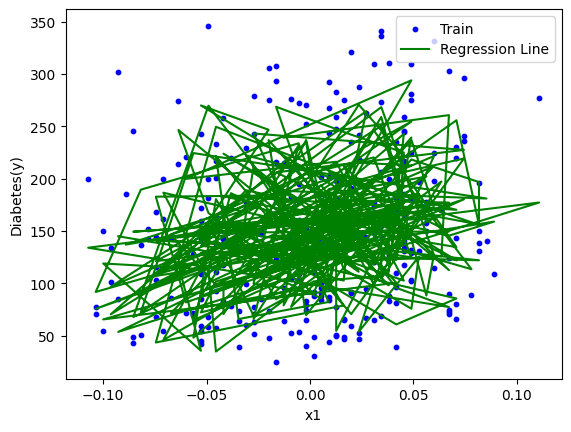

In [27]:
# plot the graph
plt.scatter(X_train["age"], y_train, s = 10, label = 'Train', color = 'blue')
plt.plot(X_train["age"], y_hat, color = 'green', label = 'Regression Line')
plt.legend()
plt.xlabel('x1')
plt.ylabel('Diabetes(y)')
plt.show()

3D graph correctly determined

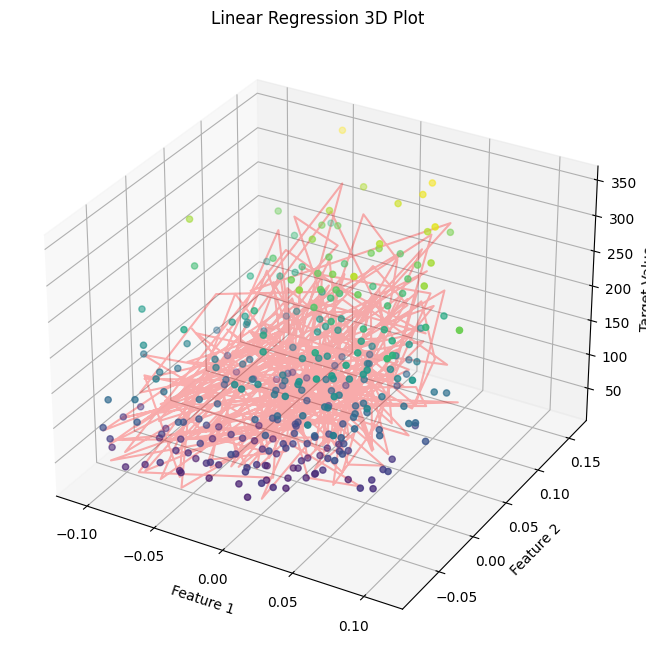

In [28]:

#from mpl_toolkits.mplot3d import Axes3D
# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X_train["age"], X_train["bmi"], y_train, c=y_train, cmap='viridis', label='Data Points')

# Plot the regression plane
ax.plot(X_train["age"], X_train["bmi"], y_hat , color='red', alpha=0.3)

# Set labels for the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target Value')

# Set a title
ax.set_title('Linear Regression 3D Plot')

plt.show()

on 1 feature

In [29]:
# let's train the model on only 2 features
X_train_1f = np.array(X_train[["bmi"]])
X_valid_1f = np.array(X_valid[["bmi"]])
X_test_1f = np.array(X_test[["bmi"]])
# y remains same for all

In [30]:
model.fit(X_train_1f, y_train)
print("model score on validation: ",model.score(X_valid_1f, y_valid))
y_hat_valid = model.predict(X_valid_1f)
y_hat_train = model.predict(X_train_1f)
y_hat_test = model.predict(X_test_1f)
print("b:", model.intercept_)
print("m values:", model.coef_)
# f(x) = coef_ * x + intercept_

model score on validation:  0.35807192324505865
b: 148.53674347978227
m values: [980.74210468]


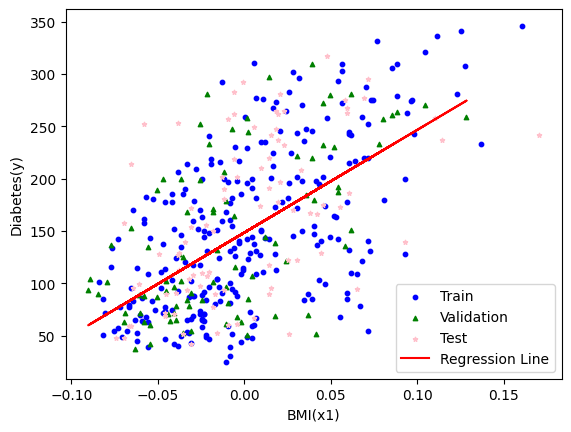

In [31]:
# plot the graph
plt.scatter(X_train_1f, y_train, s = 10, label = 'Train', color = 'blue')
plt.scatter(X_valid_1f, y_valid, s = 10, label = 'Validation', color = 'g', marker='^')
plt.scatter(X_test_1f, y_test, s = 10, label = 'Test', color = 'pink', marker='*')
plt.plot(X_valid_1f, y_hat_valid, color = 'r', label = 'Regression Line')
plt.legend()
plt.xlabel('BMI(x1)')
plt.ylabel('Diabetes(y)')
plt.show()


In [32]:
# print the errors of the model
train_error = mean_squared_error(y_train, y_hat_train)
valid_error = mean_squared_error(y_valid, y_hat_valid)
test_error = mean_squared_error(y_test, y_hat_test)
print('Train error: ', train_error)
print('Valid error: ', valid_error)
print('Test error: ', test_error)

Train error:  3775.755356619606
Valid error:  3700.6622276914622
Test error:  4494.903775033595


for various other features

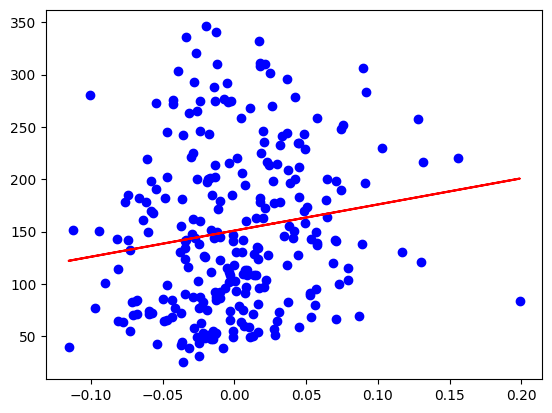

In [33]:
x_set = []
for feature in X_train.columns:
    x_f = np.array(X_train[feature])
    x_set.append(x_f)

no = 5
model.fit(x_set[no].reshape(-1,1), y_train)
y_pred_train = model.predict(x_set[no].reshape(-1,1))

# plot
plt.scatter(x_set[no], y_train, color='blue')
plt.plot(x_set[no], y_pred_train, color='red')   
plt.show()


In [34]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
# For example, if an input sample is two dimensional and of the form [a, b], 
# the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

X, y = make_regression(n_samples=100, n_features=2, random_state=3)
# 1. add X^3 feature directly to X
#X = np.c_[X, X[:, 0]**3]
# 2. OR add polynomial features
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)
print(X.shape)
model2 = LinearRegression().fit(X, y)
y_hat2 = model2.predict(X)
model2.score(X, y) * 100

(100, 6)


100.0

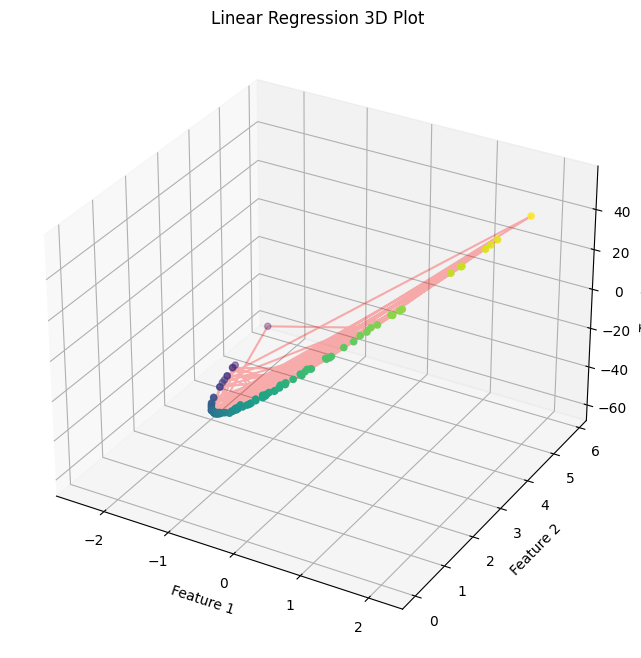

In [35]:
#from mpl_toolkits.mplot3d import Axes3D
# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X[:,1], X[:,3], y, c=y, label='Data Points')

# Plot the regression plane
ax.plot(X[:,1], X[:,3], y_hat2 , color='red', alpha=0.3)

# Set labels for the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target Value')

# Set a title
ax.set_title('Linear Regression 3D Plot')

plt.show()

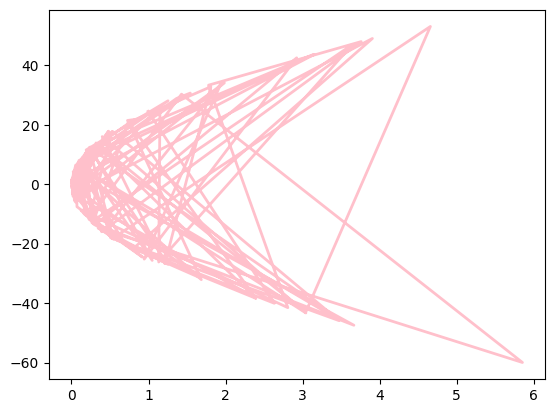

In [36]:
#plt.scatter(X[:,3], X[:,1], c=y, cmap='viridis')
plt.plot(X[:,3], y_hat2, color='pink', linewidth=2)
plt.show()